In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import random 

In [2]:
with_mask_path = '/Users/changmin.kim/Downloads/observations-master/experiements/data/with_mask'
without_mask_path = '/Users/changmin.kim/Downloads/observations-master/experiements/data/without_mask/'

In [3]:
with_mask_list = os.listdir(with_mask_path)

In [4]:
with_mask_list.sort()

In [5]:
try:
    with_mask_list.remove('.DS_Store')
    print('success to remove .DS_Store')
except:
    print('Not .DS_Store')

success to remove .DS_Store


In [6]:
len(with_mask_list)

3009

In [7]:
without_mask_list = os.listdir(without_mask_path)

In [8]:
without_mask_list.sort()

In [9]:
try:
    without_mask_list.remove('.DS_Store')
    print('success to remove .DS_Store')
except:
    print('Not .DS_Store')

success to remove .DS_Store


In [10]:
len(without_mask_list)

2499

In [11]:
def sorting_file(file_list, file_type=None):
    file_list_copy = []
    if(file_type!=None):
        for i in range(len(file_list)):
            if(file_list[i].split('.')[-1]==file_type):
                file_list_copy.append(file_list[i])
    
    else:
        for i in range(len(file_list)):
            file_list_copy.append(file_list[i])
                
    return file_list_copy

In [12]:
def visualization(image_path, image_list,length):
    plt.figure(figsize=(10,6))
    for i in range(length):
        num = random.randint(0,len(image_list))

        image = os.path.join(image_path,image_list[num])

        image = cv2.imread(image)

        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

        image = cv2.resize(image,(224,224))

        plt.subplot(length/5,5,i+1)
        plt.imshow(image)
    plt.show()

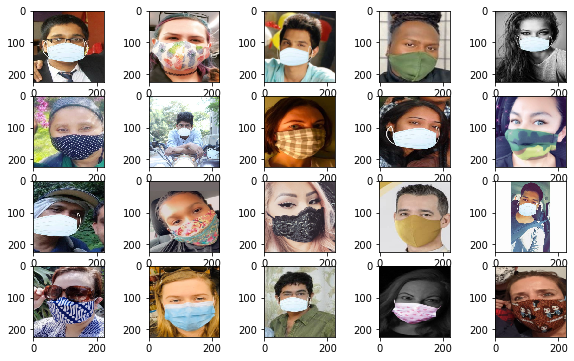

In [13]:
visualization(with_mask_path,with_mask_list,20)

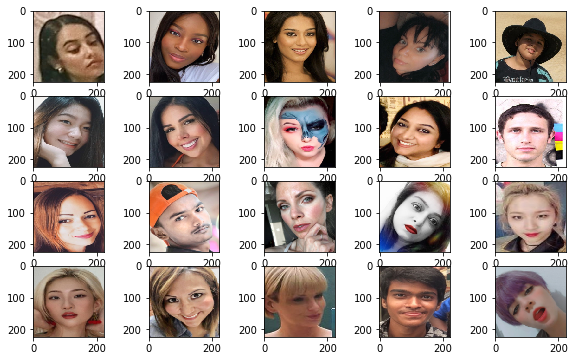

In [14]:
visualization(without_mask_path,without_mask_list,20)

In [15]:
def bring_images(image_dir, image_files,name):
    xData = []
    yData = []
    if(name!=None):
        print('with Label')
        for image_file in image_files:
            image_path = os.path.join(image_dir,image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(224,224))

            xData.append(image)
            yData.append(name)
        xData = np.array(xData)
        yData = np.array(yData)
        return xData, yData
    else:
        print('without Label')
        for image_file in image_files:
            image_path = os.path.join(image_dir,image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(224,224))

            xData.append(image)
        xData = np.array(xData)
        return xData

In [16]:
xData_with, yData_with = bring_images(with_mask_path,with_mask_list,[1,0])

with Label


In [17]:
xData_without, yData_without = bring_images(without_mask_path,without_mask_list,[0,1])

with Label


In [18]:
xTrain = np.concatenate((xData_with[:2000],xData_without[:2000]))
yTrain = np.concatenate((yData_with[:2000],yData_without[:2000]))

xValid = np.concatenate((xData_with[2000:2300],xData_without[2000:2300]))
yValid = np.concatenate((yData_with[2000:2300],yData_without[2000:2300]))

xTest = np.concatenate((xData_with[2300:2500],xData_without[2300:2500]))
yTest = np.concatenate((yData_with[2300:2500],yData_without[2300:2500]))

In [19]:
# data suffling
def data_shuffling(xData, yData, loop=15):
    print('suffling')
    for i in range(loop):
        idx = np.arange(0,len(xData))
        np.random.shuffle(idx)
        xData = xData[idx]
        yData = yData[idx]
    return (xData, yData)

In [20]:
xTrain, yTrain = data_shuffling(xTrain,yTrain,5)

xValid, yValid = data_shuffling(xValid,yValid,5)

xTest,  yTest  = data_shuffling(xTest,yTest, 5)

suffling
suffling
suffling


In [21]:
mask_dic = {0:'with_mask',1:'without_mask'}

In [22]:
## normalization
xTrain = xTrain/255.0
xValid = xValid/255.0
xTest  = xTest/255.0

In [45]:
import seaborn as sns

In [46]:
def visualization_with_histogram(xData,yData,name_dic):
    fig = plt.figure(figsize=[13,8])
    fig.set_figheight(6)
    fig.set_figwidth(15)
    for i in range(4):
        num = random.randint(0,len(xData))
        shape = xData[num].shape
        histogram = xData[num].reshape(shape[0]*shape[1]*shape[2],1)

        fig.add_subplot(2, 4, 2*i+1)
        plt.title(name_dic[np.argmax(yData[num])])
        plt.imshow(xData[num])
        plt.axis('off')
        fig.add_subplot(2, 4, 2*i+2)
        sns.distplot(histogram,kde=True,hist=True)
    plt.show()

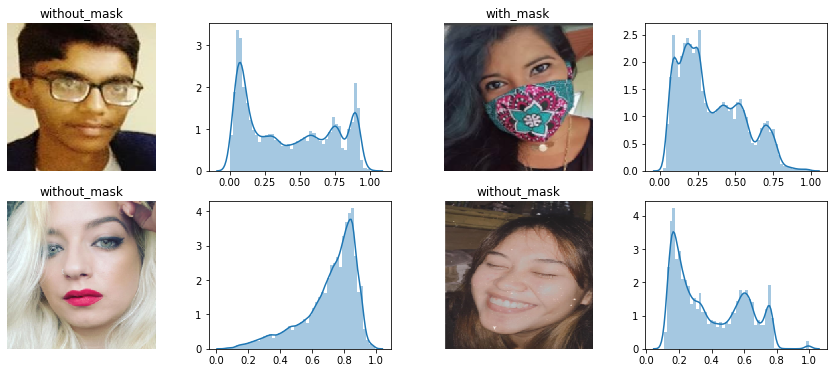

In [47]:
visualization_with_histogram(xTrain,yTrain,mask_dic)

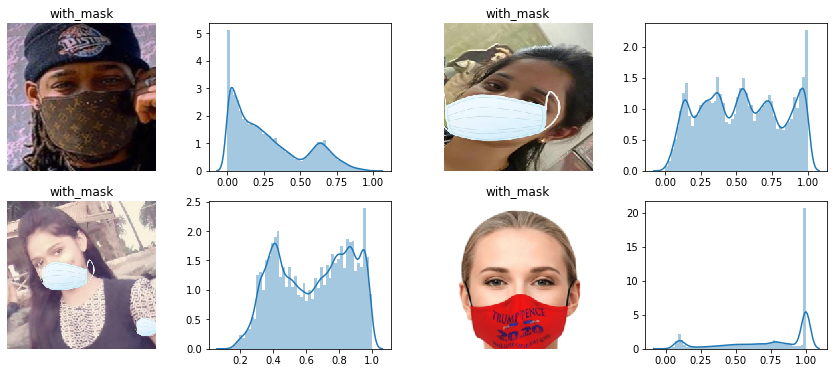

In [26]:
visualization_with_histogram(xValid,yValid,mask_dic)

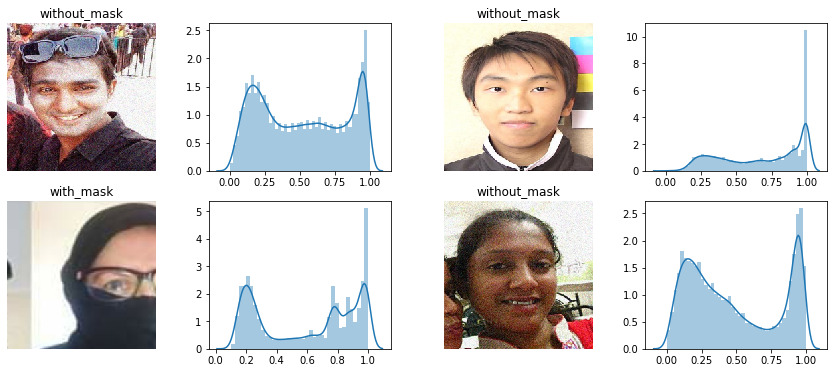

In [27]:
visualization_with_histogram(xTest,yTest,mask_dic)

In [85]:
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
import tensorflow.keras.layers as layers
import tensorflow.keras as keras

In [86]:
mobile_neck = MobileNetV2(weights="imagenet",include_top=False,input_shape=(224,224,3), pooling="avg")

In [29]:
inception_bottle_neck = InceptionV3(weights="imagenet",include_top=False,input_shape=(224,224,3), pooling="avg")

In [87]:
mobile_neck.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [89]:
mobile_train = mobile_neck.predict(xTrain,batch_size=40,verbose=1)
mobile_valid = mobile_neck.predict(xValid,batch_size=40,verbose=1)
mobile_test = mobile_neck.predict(xTest,batch_size=40,verbose=1)

399/399 [==============================] - 8s 19ms/sample


In [90]:
print('train_mobile feature shape:',mobile_train.shape)
print('valid_mobile feature shape:',mobile_valid.shape)
print('test_mobile feature shape:',mobile_test.shape)

train_mobile feature shape: (4000, 1280)
valid_mobile feature shape: (600, 1280)
test_mobile feature shape: (399, 1280)


In [30]:
inception_bottle_neck.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [88]:
inception_train = inception_bottle_neck.predict(xTrain,batch_size=40,verbose=1)

inception_valid = inception_bottle_neck.predict(xValid,batch_size=40,verbose=1)

inception_test  = inception_bottle_neck.predict(xTest ,batch_size=40,verbose=1)

 200/4000 [>.............................] - ETA: 1:32

KeyboardInterrupt: 

In [32]:
print('train_inception feature shape:',inception_train.shape)
print('valid_inception feature shape:',inception_valid.shape)
print('test_inception feature shape:',inception_test.shape)

train_inception feature shape: (4000, 2048)
valid_inception feature shape: (600, 2048)
test_inception feature shape: (399, 2048)


In [101]:
def create_my_model():
    model = models.Sequential()
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.Dense(2,activation='softmax'))
    return model

In [102]:
inception_model = create_my_model()

In [103]:
mobile_model = create_my_model()

In [104]:
epochs = 30
batch_size = 40
learing_rate = 0.0001
steps_per_epoch = 100
validation_steps = 15

In [105]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learing_rate,
    decay_steps=steps_per_epoch*5,
    decay_rate=0.5,
    staircase=True
)

mobile_model.compile(
    optimizer=keras.optimizers.Adam(lr_schedule),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

inception_model.compile(
    optimizer=keras.optimizers.Adam(lr_schedule),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [106]:
mobile_history = mobile_model.fit(
    x=mobile_train,y=yTrain,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch= steps_per_epoch,
    validation_data=(mobile_valid,yValid),
    validation_steps= validation_steps
)

Train on 4000 samples, validate on 600 samples
Epoch 1/30
4000/4000 [==============================] - 0s 116us/sample - loss: 0.1904 - accuracy: 0.9225 - val_loss: 0.0591 - val_accuracy: 0.9767
Epoch 2/30
4000/4000 [==============================] - 0s 55us/sample - loss: 0.0638 - accuracy: 0.9810 - val_loss: 0.0436 - val_accuracy: 0.9867
Epoch 3/30
4000/4000 [==============================] - 0s 50us/sample - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.0413 - val_accuracy: 0.9850
Epoch 4/30
4000/4000 [==============================] - 0s 50us/sample - loss: 0.0366 - accuracy: 0.9895 - val_loss: 0.0373 - val_accuracy: 0.9850
Epoch 5/30
4000/4000 [==============================] - 0s 50us/sample - loss: 0.0312 - accuracy: 0.9910 - val_loss: 0.0342 - val_accuracy: 0.9933
Epoch 6/30
4000/4000 [==============================] - 0s 51us/sample - loss: 0.0259 - accuracy: 0.9937 - val_loss: 0.0353 - val_accuracy: 0.9917
Epoch 7/30
4000/4000 [==============================] - 0s 51us/sample

In [108]:
result = mobile_model.evaluate(mobile_test,yTest,batch_size=40)

print('loss:',result[0])
print("정확도:",result[1])

399/399 [==============================] - 0s 218us/sample - loss: 0.0052 - accuracy: 1.0000
loss: 0.005187320552724309
정확도: 1.0


In [78]:
inception_history = inception_model.fit(
    x=inception_train,y=yTrain,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch= steps_per_epoch,
    validation_data=(inception_valid,yValid),
    validation_steps= validation_steps
)

Train on 4000 samples, validate on 600 samples
Epoch 1/30
4000/4000 [==============================] - 1s 183us/sample - loss: 0.1051 - accuracy: 0.9617 - val_loss: 0.0519 - val_accuracy: 0.9850
Epoch 2/30
4000/4000 [==============================] - 0s 96us/sample - loss: 0.0369 - accuracy: 0.9908 - val_loss: 0.0451 - val_accuracy: 0.9917
Epoch 3/30
4000/4000 [==============================] - 0s 97us/sample - loss: 0.0258 - accuracy: 0.9937 - val_loss: 0.0432 - val_accuracy: 0.9900
Epoch 4/30
4000/4000 [==============================] - 0s 97us/sample - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.0397 - val_accuracy: 0.9917
Epoch 5/30
4000/4000 [==============================] - 0s 98us/sample - loss: 0.0186 - accuracy: 0.9955 - val_loss: 0.0399 - val_accuracy: 0.9917
Epoch 6/30
4000/4000 [==============================] - 0s 97us/sample - loss: 0.0164 - accuracy: 0.9965 - val_loss: 0.0390 - val_accuracy: 0.9933
Epoch 7/30
4000/4000 [==============================] - 0s 98us/sample

In [79]:
result = inception_model.evaluate(inception_test,yTest,batch_size=40)

print('loss:',result[0])
print("정확도:",result[1])

399/399 [==============================] - 0s 239us/sample - loss: 0.0046 - accuracy: 0.9975
loss: 0.00460941611904707
정확도: 0.99749374


In [81]:
from tensorflow.keras.models import load_model

In [84]:
# inception_model.save("/Users/changmin.kim/Downloads/check_mask_model.h5")

In [115]:
mobile_model.save("/Users/changmin.kim/Downloads/mobile_check_mask_model.h5")

In [113]:
## without_mask
my_image_path = '/Users/changmin.kim/Downloads/changmin.jpg'

my_image = cv2.imread(my_image_path)

my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2RGB)

my_image = cv2.resize(my_image,(224,224))
my_image = my_image/255.0



## with_mask
my_image_with_mask_path = '/Users/changmin.kim/Downloads/changmin_with_mask.jpeg'

my_image_with_mask = cv2.imread(my_image_with_mask_path)

my_image_with_mask = cv2.cvtColor(my_image_with_mask,cv2.COLOR_BGR2RGB)

my_image_with_mask = cv2.resize(my_image_with_mask,(224,224))
my_image_with_mask = my_image_with_mask/255.0

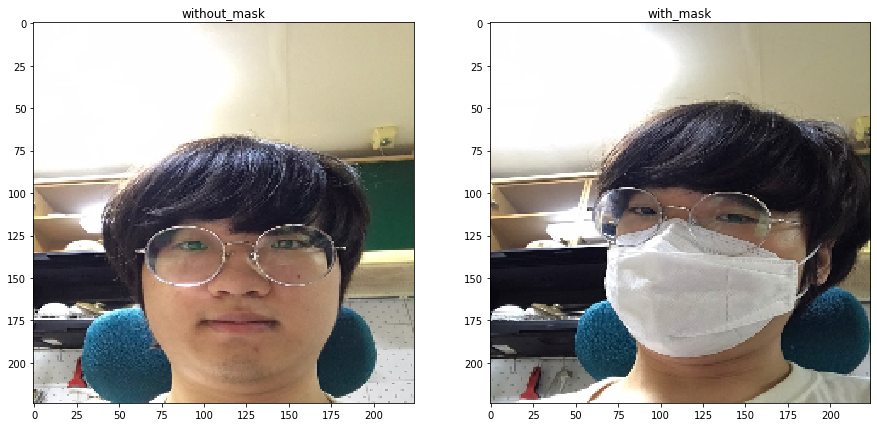

In [114]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.imshow(my_image)
my_image = mobile_neck(np.expand_dims(my_image,0))
plt.title(mask_dic[np.argmax(mobile_model.predict(my_image))])


plt.subplot(1,2,2)
plt.imshow(my_image_with_mask)
my_image_with_mask = mobile_neck(np.expand_dims(my_image_with_mask,0))
result = mobile_model(my_image_with_mask)
plt.title(mask_dic[np.argmax(result)])

plt.show()


## inference

In [73]:
test_data_path = '/Users/changmin.kim/Downloads/test'

In [74]:
test_data_list = os.listdir(test_data_path)

In [75]:
len(test_data_list)

1035

In [78]:
test_data = bring_images(test_data_path,test_data_list,None)

without Label


In [79]:
test_data = test_data/255.0

In [80]:
predict = inception_bottle_neck.predict(test_data,batch_size=40,verbose=1)

1035/1035 [==============================] - 21s 20ms/sample


In [81]:
predict = inception_model(predict)

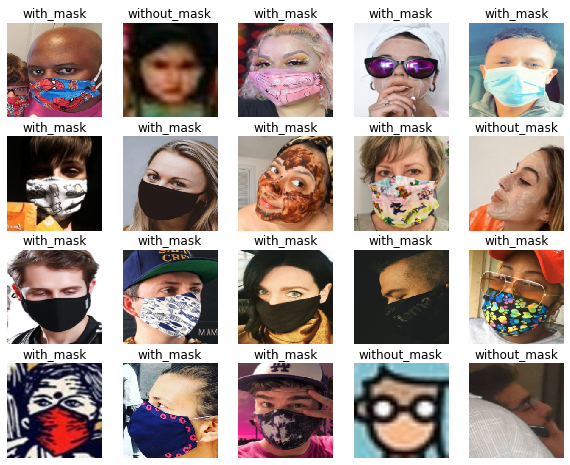

In [82]:
plt.figure(figsize=(10,8))
for i in range(20):
    num = random.randint(0,len(test_data))
    plt.subplot(4,5,i+1)
    plt.axis('off')
    plt.imshow(test_data[num])
    plt.title(mask_dic[np.argmax(predict[num])])
plt.show()

In [84]:
inception_feature = InceptionV3(weights="imagenet",include_top=False,input_shape=(224,224,3))

In [85]:
inception_feature.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

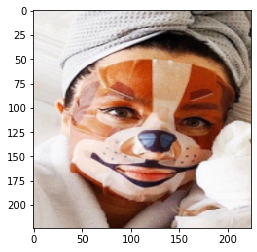

In [147]:
plt.imshow(test_data[0])

In [148]:
test_data[0].shape

(224, 224, 3)

In [189]:
my_feature = inception_feature(np.expand_dims(my_image,axis=0))

In [190]:
my_feature_with_mask  = inception_feature(np.expand_dims(my_image_with_mask,axis=0))

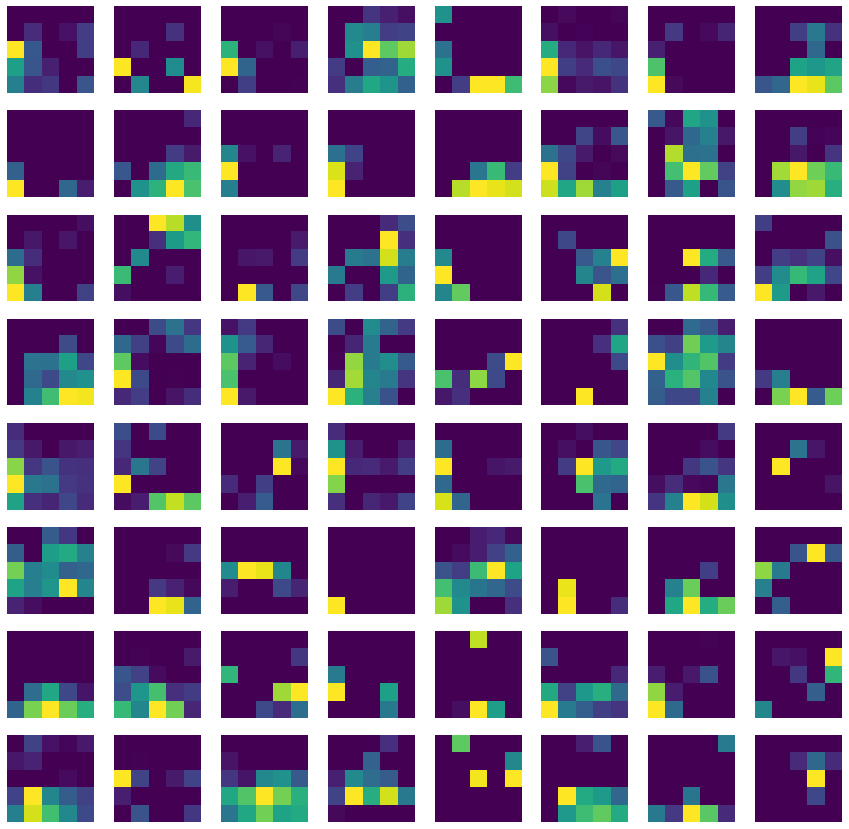

In [193]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(my_feature[0,:,:,i])
    plt.axis('off')
plt.show()

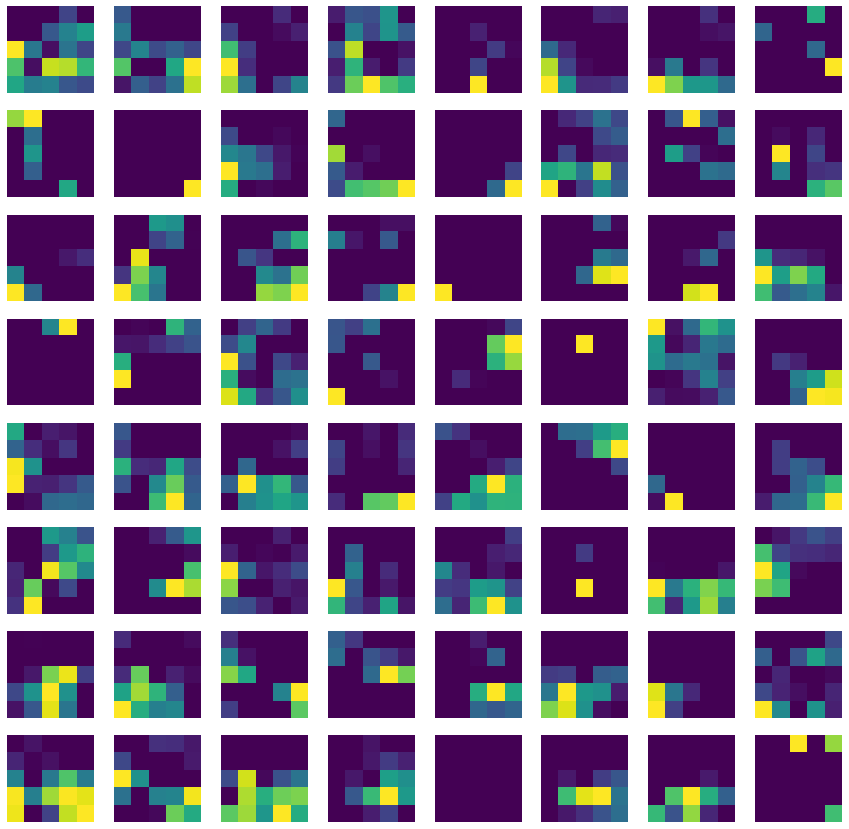

In [194]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(my_feature_with_mask[0,:,:,i])
    plt.axis('off')
plt.show()

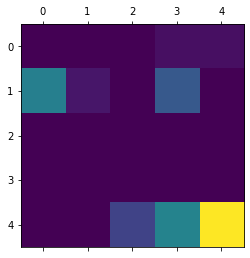

In [98]:
plt.matshow(my_feature_with_mask[0,:,:,19],cmap="viridis")

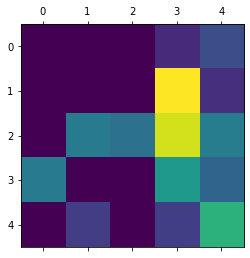

In [97]:
plt.matshow(my_feature[0,:,:,19],cmap="viridis")